In [8]:
# Instalación de paquetes si estás en Colab
!pip install opencv-python matplotlib numpy

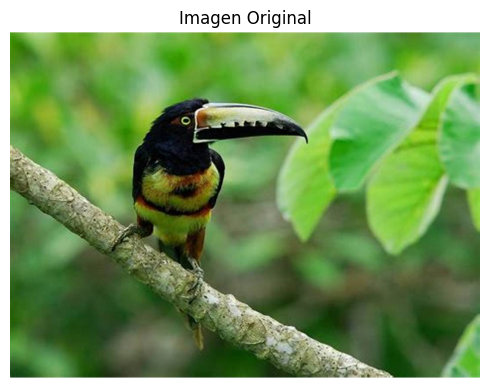

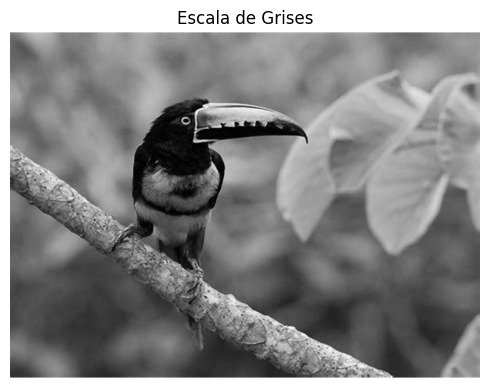

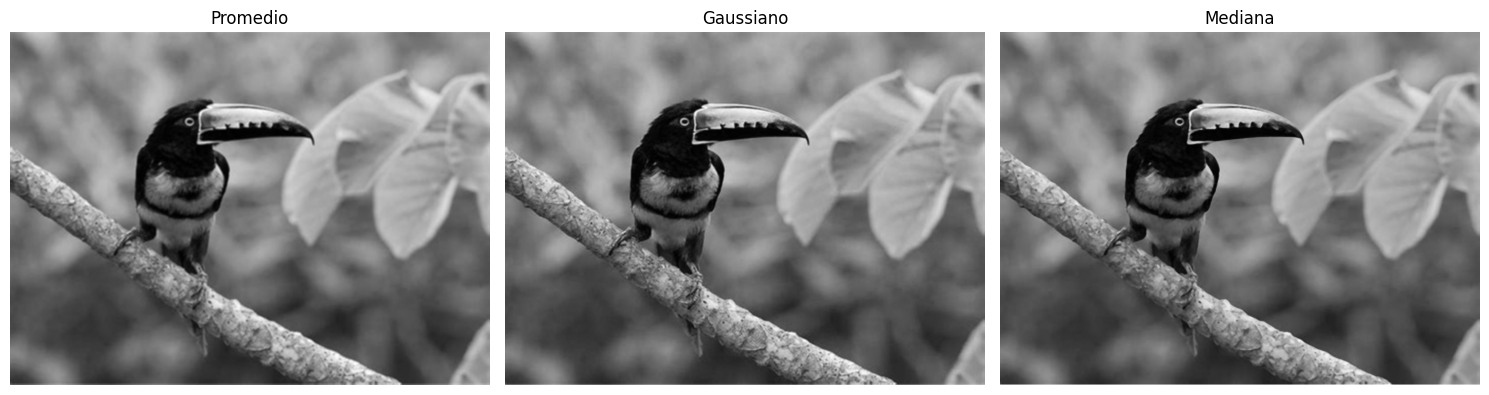

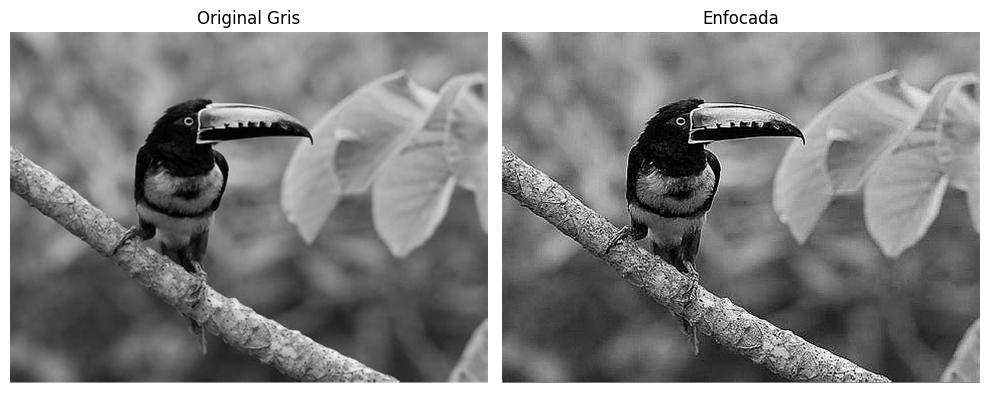

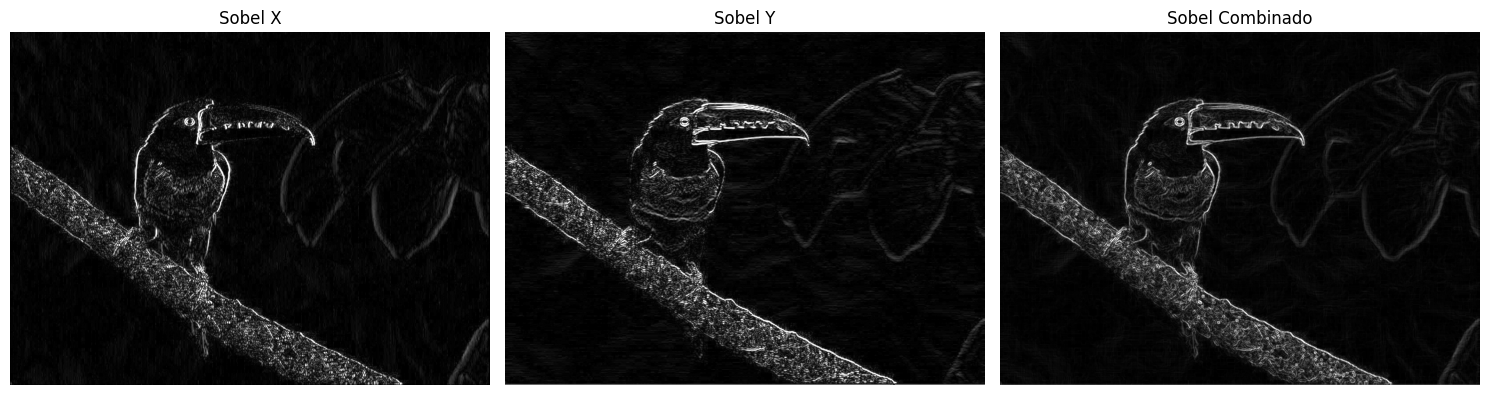

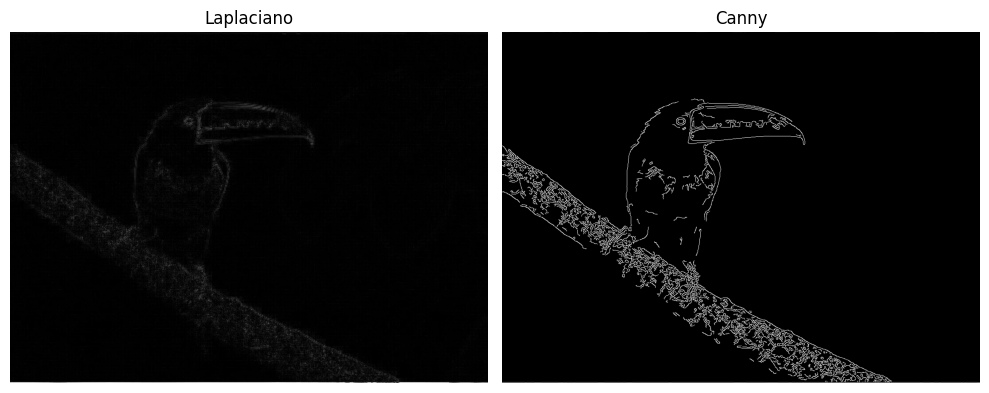

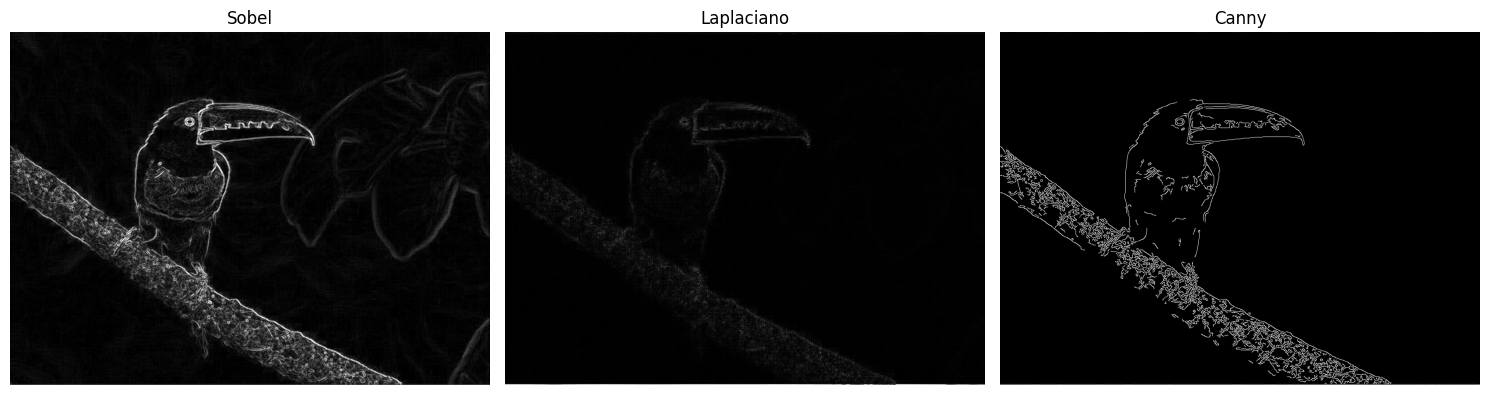

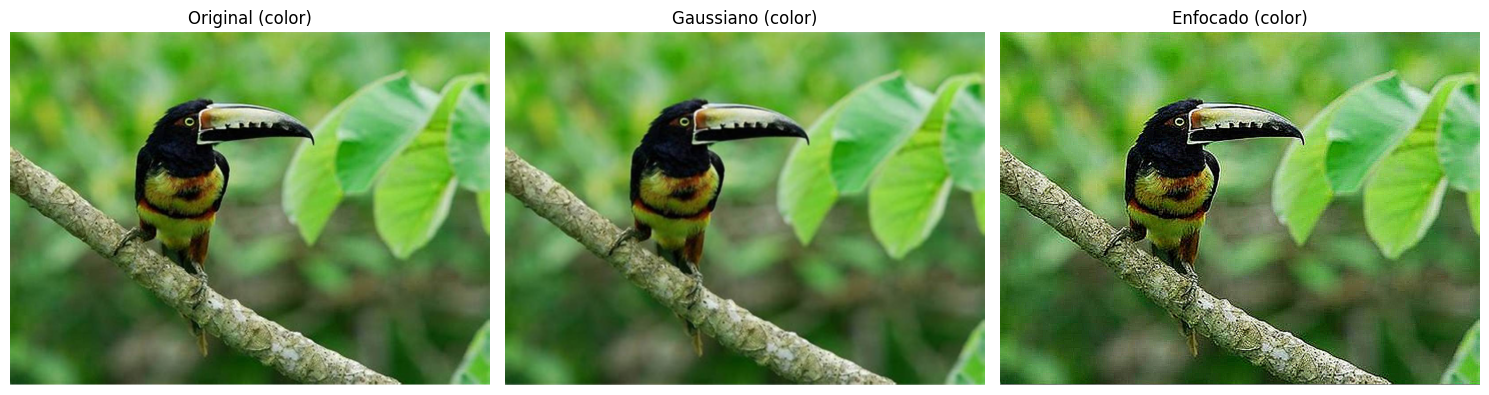

In [9]:
# Importaciones necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# ---------- Funciones auxiliares ----------
def descargar_imagen(url, nombre_archivo):
    try:
        urllib.request.urlretrieve(url, nombre_archivo)
        return True
    except:
        return False

def mostrar_imagenes(lista_imgs, titulos, filas=1, cmap='gray'):
    columnas = len(lista_imgs) // filas + (len(lista_imgs) % filas > 0)
    fig, axes = plt.subplots(filas, columnas, figsize=(5 * columnas, 5 * filas))
    axes = np.array(axes).reshape(filas, columnas)

    for i, img in enumerate(lista_imgs):
        ax = axes[i // columnas, i % columnas]
        ax.imshow(img, cmap=cmap if img.ndim == 2 else None)
        ax.set_title(titulos[i])
        ax.axis('off')

    for i in range(len(lista_imgs), filas * columnas):
        axes[i // columnas, i % columnas].axis('off')

    plt.tight_layout()
    plt.show()

# ---------- Clase para procesamiento de imagen ----------
class ProcesadorImagen:
    def __init__(self, path_imagen):
        self.color = cv2.imread(path_imagen)
        self.rgb = cv2.cvtColor(self.color, cv2.COLOR_BGR2RGB)
        self.gris = cv2.cvtColor(self.color, cv2.COLOR_BGR2GRAY)

    def aplicar_desenfoques(self):
        return {
            'Promedio': cv2.blur(self.gris, (5, 5)),
            'Gaussiano': cv2.GaussianBlur(self.gris, (5, 5), 0),
            'Mediana': cv2.medianBlur(self.gris, 5)
        }

    def enfocar(self):
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        return cv2.filter2D(self.gris, -1, kernel)

    def bordes_sobel(self):
        sx = cv2.Sobel(self.gris, cv2.CV_64F, 1, 0, ksize=3)
        sy = cv2.Sobel(self.gris, cv2.CV_64F, 0, 1, ksize=3)
        return {
            'Sobel X': cv2.convertScaleAbs(sx),
            'Sobel Y': cv2.convertScaleAbs(sy),
            'Sobel Combinado': cv2.addWeighted(
                cv2.convertScaleAbs(sx), 0.5,
                cv2.convertScaleAbs(sy), 0.5, 0
            )
        }

    def bordes_laplaciano(self):
        lap = cv2.Laplacian(self.gris, cv2.CV_64F)
        return cv2.convertScaleAbs(lap)

    def bordes_canny(self, t1=100, t2=200):
        return cv2.Canny(self.gris, t1, t2)

    def filtros_color(self):
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        return {
            'Gaussiano (color)': cv2.GaussianBlur(self.rgb, (5, 5), 0),
            'Enfocado (color)': cv2.filter2D(self.rgb, -1, kernel)
        }

# ---------- Flujo principal ----------
url = 'https://tse1.mm.bing.net/th/id/OIP.virw0zGjgJHzZXizUSjfnwHaFc?cb=iwc1&w=1080&h=795&rs=1&pid=ImgDetMain'
urllib.request.urlretrieve(url, 'entrada.jpg')

img_proc = ProcesadorImagen('entrada.jpg')

# Mostrar imagen original
mostrar_imagenes([img_proc.rgb], ['Imagen Original'], cmap=None)
mostrar_imagenes([img_proc.gris], ['Escala de Grises'])

# Desenfoques
desenfoques = img_proc.aplicar_desenfoques()
mostrar_imagenes(list(desenfoques.values()), list(desenfoques.keys()))

# Enfoque
imagen_enfocada = img_proc.enfocar()
mostrar_imagenes([img_proc.gris, imagen_enfocada], ['Original Gris', 'Enfocada'])

# Bordes Sobel
bordes_sobel = img_proc.bordes_sobel()
mostrar_imagenes(list(bordes_sobel.values()), list(bordes_sobel.keys()))

# Bordes Laplaciano y Canny
laplaciano = img_proc.bordes_laplaciano()
canny = img_proc.bordes_canny()

mostrar_imagenes([laplaciano, canny], ['Laplaciano', 'Canny'])

# Comparación de bordes
mostrar_imagenes([
    bordes_sobel['Sobel Combinado'], laplaciano, canny
], ['Sobel', 'Laplaciano', 'Canny'])

# Filtros a color
filtros_color = img_proc.filtros_color()
mostrar_imagenes([img_proc.rgb] + list(filtros_color.values()),
                 ['Original (color)'] + list(filtros_color.keys()), cmap=None)
